In [1]:
import pandas as pd
import re

In [13]:
df = pd.read_csv("../skipped_wiki-small.txt")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101039 entries, 0 to 1101038
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   QueryId       1101039 non-null  int64 
 1   Algorithm     1101039 non-null  object
 2   DocIdSkipped  1101039 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 25.2+ MB


In [30]:
f = open("../posting_length_wiki-small.txt","r")
lines = f.readlines()
sizes = dict()
sizes["MAX_SCORE"] = dict()
sizes["WAND"] = dict()
sizes["LAZY_BM"] = dict()
avgSizes = dict()
avgSizes["MAX_SCORE"] = dict()
avgSizes["WAND"] = dict()
avgSizes["LAZY_BM"] = dict()
for line in lines:
    line = line.replace("\n", "")
    lineData = line.split(",")
    querySizes = []
    for i in range(2, len(lineData)):
        if len(lineData[i]) > 0:
            querySizes.append(int(lineData[i]))
    sizes[lineData[1]][lineData[0]] = querySizes
    if len(querySizes) > 0:
        avgSizes[lineData[1]][int(lineData[0])] = int(sum(querySizes) / len(querySizes))
    else:
        avgSizes[lineData[1]][int(lineData[0])] = 0

In [31]:
algorithms = []
queryIds = []
avgSizeList = []
for alg in avgSizes:
    for queryId in avgSizes[alg]:
        algorithms.append(alg)
        queryIds.append(queryId)
        avgSizeList.append(avgSizes[alg][queryId])

df0 = pd.DataFrame(
    {'Algorithm': algorithms,
     'QueryId': queryIds,
     'AvgListSize': avgSizeList
    })

<Axes: title={'center': 'DocIdSkipped'}, xlabel='Algorithm'>

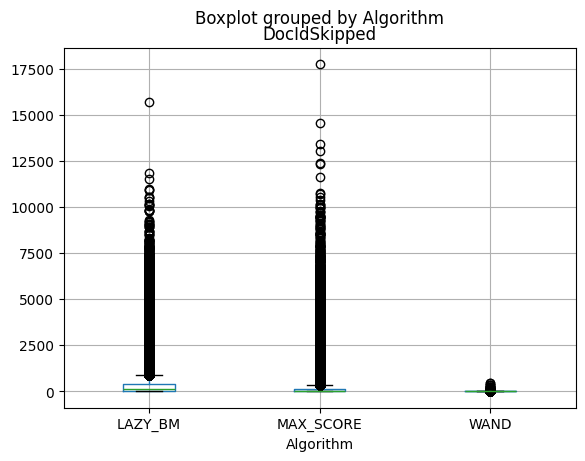

In [14]:
df.boxplot(column=['DocIdSkipped'], by='Algorithm')

(0.0, 1000.0)

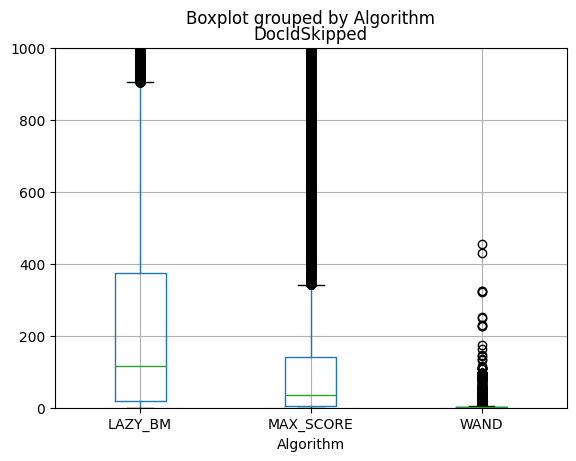

In [16]:
boxplot = df.boxplot(column=['DocIdSkipped'], by='Algorithm')
boxplot.set_ylim([0, 1000])

In [32]:
dataset = pd.merge(
    left=df,
    right=df0,
    how='left',
    left_on=['Algorithm', 'QueryId'],
    right_on=['Algorithm', 'QueryId'],
)
dataset

,QueryId,Algorithm,DocIdSkipped,AvgListSize
0,1185869,MAX_SCORE,67,221
1,1185869,WAND,4,221
2,1185869,LAZY_BM,624,221
3,1185868,MAX_SCORE,428,214
4,1185868,WAND,12,214
...,...,...,...,...
1101034,706678,WAND,0,0
1101035,706678,LAZY_BM,0,0
1101036,405466,MAX_SCORE,5,25
1101037,405466,WAND,2,25


In [37]:
dataset.groupby(['Algorithm'])['DocIdSkipped'].mean()

Algorithm
LAZY_BM      336.090089
MAX_SCORE    178.163708
WAND           2.271718
Name: DocIdSkipped, dtype: float64

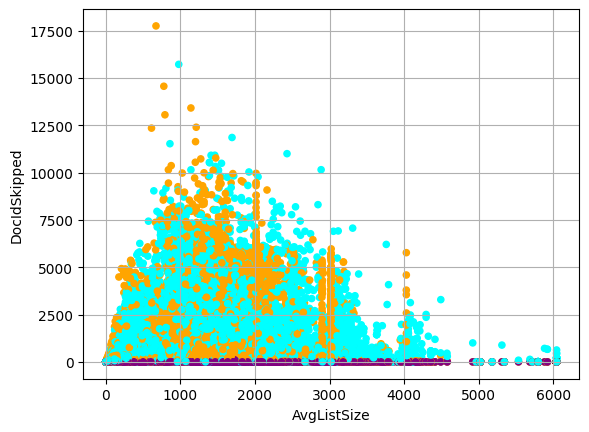

In [34]:
colors = {'MAX_SCORE': 'orange', 'WAND': 'purple', 'LAZY_BM': 'cyan'}
color_list = [colors[group] for group in dataset['Algorithm']]

ax = dataset.plot.scatter('AvgListSize',
                'DocIdSkipped',
                c=color_list,
                grid=True)
#dataset.reset_index().plot(kind='scatter', x='AvgListSize', y='Skipped')